In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:87% !important; }</style>"))

# Load Enviroment

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) #Permite ver todas las columnas.
pd.set_option('display.max_rows', None) #Permite ver todas las filas

In [3]:
import json
import os
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Google Cloud Client Library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [4]:
from tqdm import tnrange, tqdm_notebook

# Functions

In [5]:
def extractSentiment(text):
    '''
    Función que devuelve el análisis de sentimientos de un texto dado como input.
    '''
    client = language.LanguageServiceClient()                                     # Instantiates a client   
    document = types.Document(content=text, type=enums.Document.Type.PLAIN_TEXT)
    analysis = client.analyze_sentiment(document=document, encoding_type='UTF8')  # Detects the sentiment of the text
    #print('Sentiment: {}, {}'.format(analysis.document_sentiment.score, analysis.document_sentiment.magnitude))
    return(analysis)

In [6]:
def sml(row, text_field):
    try:
        analysis = extractSentiment(row[text_field])
        row['score'] = analysis.document_sentiment.score
        row['magnitude'] = analysis.document_sentiment.magnitude
        row['language'] = analysis.language
        return(row)
    except:
        return(None)

In [7]:
def plot_sentimentAnalysis(score, date, title=None, save_name=None):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    #Plots
    line1 = ax1.plot(score, date, linestyle='-', marker='o', color='#64e2f4', linewidth=2)
    
    #Range
    ax1.set_ylim(-1, 1)
    
    #Format the ticks
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    years_fmt = mdates.DateFormatter('%Y')
    #months_fmt = mdates.DateFormatter('%m')
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(years_fmt)
    ax1.xaxis.set_minor_locator(months)
    #ax1.xaxis.set_minor_formatter(months_fmt)
    ax1.tick_params(axis='x', which='major', width=2, length=8)
    ax1.tick_params(which='minor', width=2, length=4)
    ax1.grid()
    
    #Titles
    plt.title(title, y=1, size=15,  weight='bold')
    plt.ylabel('Sentimiento', color='dimgray', size = 13)
    plt.xlabel('Fecha', color='dimgray', size = 13)
    
    #Show
    if save_name:
        plt.savefig('../data/img/'+save_name+'.png', dpi = 1000, transparent=True)
    plt.show()
    
    

In [8]:
def sentimentAnalysis_GoogleAPI(filename:str, text_field:str):
    '''
    Devuelve el análisis de sentimiento de un archivo JSON cuya estructura es:
    
    key: to identify the new: number, web, unique name... (not used)
     |-values: will be the columns of a dataframe.
     |  |-text_field: the most important, we will analize this field. In this case: new
     |  |-title
     |  |-date
     |  |-source
     |  |-keyword
     |  |-others...
     
     
     Argumentos:
     - filename: nombre del archivo.
     - text_field: del JSON, el campo que contiene el texto.
    '''
    
    #Read and convert to dataframe
    path = '../data/'+filename
    with open(path, 'r', encoding='utf-8') as f:
        datastore = json.load(f)
    df = pd.DataFrame(datastore.values())
    
    #Transformations (propio de este ejercicio)
    df[['day', 'month', 'year']] = df['date'].str.split(expand=True)
    mapping = {'ene.':1, 'feb.':2, 'mar.':3, 'abr.':4, 'may.':5, 'jun.':6, 'jul.':7, 'ago.':8, 'sept.':9, 'oct.':10, 'nov.':11, 'dic.':12}
    df[['month']] = df[['month']].applymap(mapping.get).astype(int)
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df2 = df.apply(lambda x: sml(x, text_field), axis=1).sort_values('date')
    
    plot_sentimentAnalysis(df2.date, df2.score, title=df2.keyword[0], save_name=df2.keyword[0])
    
    df2.to_csv('../data/'+df.keyword[0]+'.csv')
    
    
    return('Done!')

In [9]:
def getFilesByRe(path, re_search=r".*"):   
    return([f for f in os.listdir(path) if re.search(re_search, f, re.IGNORECASE)])

# Simple Example

In [10]:
#sentimentAnalysis_GoogleAPI('PredictLand.json', 'new')

&nbsp;

# Sentiment Analysis for All News

Configuración: https://cloud.google.com/natural-language/docs/quickstart#set_up_a_project

Sentiment Analysis Tutorial: https://cloud.google.com/natural-language/docs/sentiment-tutorial


&nbsp; 

**`Facturación`**: https://console.developers.google.com/billing/0195A2-9C5CBB-BD9DDC?authuser=0

**`Precios`**: https://cloud.google.com/natural-language/pricing?hl=es-419

In [11]:
#df[df.month.isnull()] ['ZINKIA ENTERTAINMENT SA']:

1NKEMIA_2.json


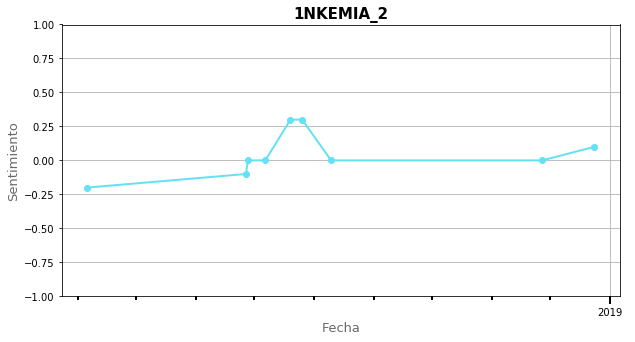

GRINO ECOLOGIC_2.json


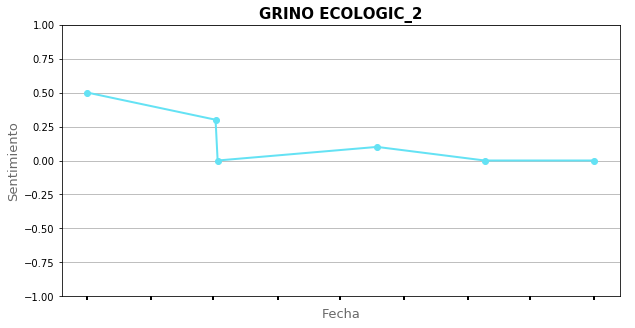

ADL BIONATUR_2.json


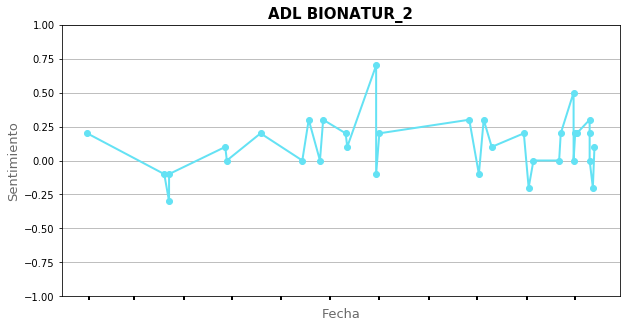

SECUOYA GRUPO DE COMUNICACION SA_2.json


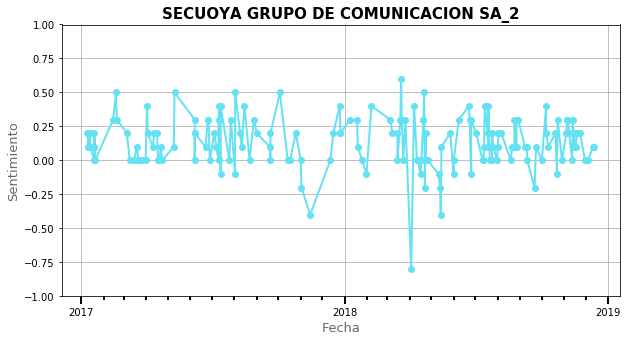

EUROESPES SA_2.json


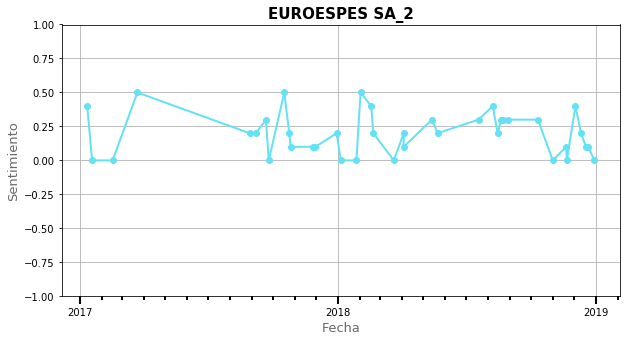

EURONA WIRELESS TELECOM SA_2.json


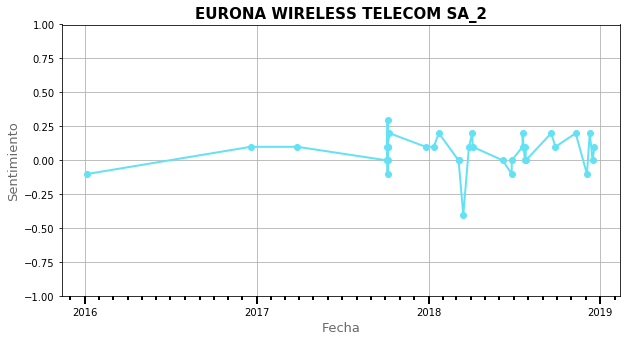

AB-BIOTICS SA_2.json


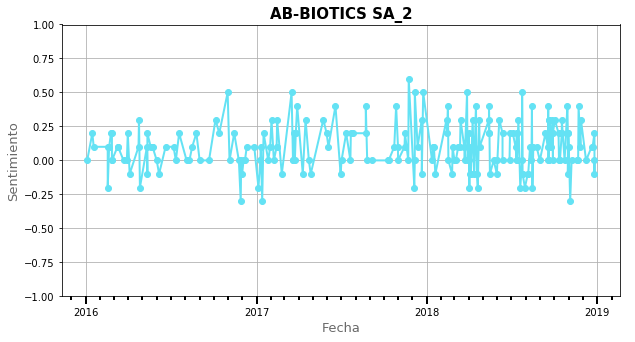

MEDCOM TECH SA_2.json


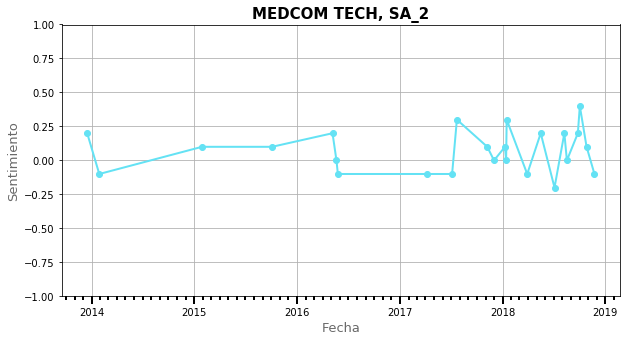

IMAGINARIUM_2.json


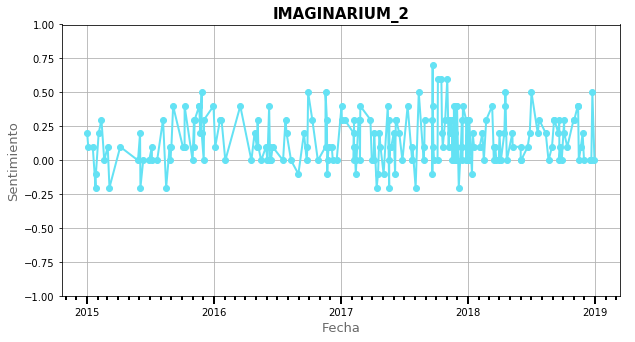

ZINKIA ENTERTAINMENT SA_2.json


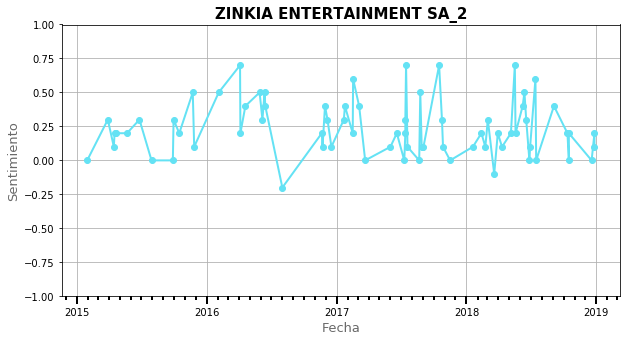

In [12]:
#filename = '1NKEMIA.json'

for filename in ['1NKEMIA_2.json', 'GRINO ECOLOGIC_2.json', 'ADL BIONATUR_2.json',
                 'SECUOYA GRUPO DE COMUNICACION SA_2.json', 'EUROESPES SA_2.json',
                'EURONA WIRELESS TELECOM SA_2.json', 'AB-BIOTICS SA_2.json',
                'MEDCOM TECH SA_2.json', 'IMAGINARIUM_2.json', 'ZINKIA ENTERTAINMENT SA_2.json']:
    #Read and convert to dataframe
    print(filename)
    path = '../data/'+filename
    with open(path, 'r', encoding='utf-8') as f:
        datastore = json.load(f)
    df = pd.DataFrame(datastore.values())

    #Transformations (propio de este ejercicio)
    text_field = 'new'

    df = df[df['new'].notnull()]
    df[['day', 'month', 'year']] = df['date'].str.split(expand=True)
    mapping = {'ene.':1, 'feb.':2, 'mar.':3, 'abr.':4, 'may.':5, 'jun.':6, 'jul.':7, 'ago.':8, 'sept.':9, 'oct.':10, 'nov.':11, 'dic.':12}

    try:
        df[['month']] = df[['month']].applymap(mapping.get).astype(int)
    except ValueError:
        df[['month']] = df[['month']].applymap(mapping.get)
        print(df[df['month'].isnull()])

    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    #Extracción del sentimiento
    df2 = df.apply(lambda x: sml(x, text_field), axis=1).sort_values('date')

    #plot
    plot_sentimentAnalysis(df2.date, df2.score, title=df2.keyword.tolist()[0], save_name=df2.keyword.tolist()[0])

    #save
    df2.to_csv('../data/'+df2.keyword.tolist()[0]+'.csv')

In [13]:
df2.keyword.tolist()[0]

'ZINKIA ENTERTAINMENT SA_2'

In [14]:
#Para volver a plotear
# df2 = pd.read_csv('../data/AB-BIOTICS SA.csv')
# df2['date'] = pd.to_datetime(df2[['year', 'month', 'day']])
# plot_sentimentAnalysis(df2.date, df2.score, title=df2.keyword[0], save_name=df2.keyword[0])